In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("movies_2026.csv", encoding='latin1')
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['month'] = df['releaseDate'].dt.month

In [3]:
print("\n"+"="*50)
print(df.head())
print("\n"+"="*50)
print(df.shape)


        id  budget                        genres homePage productionCompany  \
0  1627085     0.0                   Drama|Crime      NaN               NaN   
1  1626914     0.0                     Animation      NaN               NaN   
2  1626898     0.0                     Animation      NaN               NaN   
3  1626808     0.0  Thriller|Mystery|Documentary      NaN               NaN   
4  1626678     0.0                     Animation      NaN               NaN   

  productionCompanyCountry productionCountry  revenue  runtime  video  ...  \
0                      NaN               NaN      0.0       95  False  ...   
1                      NaN               NaN      0.0        3  False  ...   
2                      NaN               NaN      0.0        2  False  ...   
3                      NaN               NaN      0.0        5  False  ...   
4                      NaN               NaN      0.0       12  False  ...   

  voteAvg voteCount genresAmount productionCoAmount pro

In [4]:
# info general 
print("\n"+"="*50)
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         19883 non-null  int64         
 1   budget                     19883 non-null  float64       
 2   genres                     17918 non-null  str           
 3   homePage                   5607 non-null   str           
 4   productionCompany          14223 non-null  str           
 5   productionCompanyCountry   11473 non-null  str           
 6   productionCountry          16009 non-null  str           
 7   revenue                    19883 non-null  float64       
 8   runtime                    19883 non-null  int64         
 9   video                      19397 non-null  object        
 10  director                   18907 non-null  str           
 11  actors                     17282 non-null  str           
 12  actorsPopulari

In [5]:
# estadisticos basicos

print("\n"+"="*50)
df.describe()

,id,budget,revenue,runtime,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear,month
count,1.988300e+04,1.988300e+04,1.988300e+04,19883.000000,19883.000000,19881,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19846.000000,19721.000000,19881.000000,19881.000000
mean,9.022402e+05,9.413280e+06,2.879213e+07,66.093799,26.248842,2017-06-09 04:48:42.589407,3.837069,675.927325,1.949253,1.972539,1.230247,1082.049640,3516.505996,8224.352061,2016.827222,7.846889
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1902-04-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000,1.000000
25%,1.462195e+05,0.000000e+00,0.000000e+00,10.000000,0.054600,2013-02-07 00:00:00,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2013.000000,4.000000
50%,8.696230e+05,0.000000e+00,0.000000e+00,86.000000,8.502000,2021-12-10 00:00:00,5.400000,6.000000,2.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2021.000000,10.000000
75%,1.589602e+06,1.000000e+06,3.306335e+05,103.000000,22.239000,2025-12-07 00:00:00,6.800000,423.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000,2025.000000,11.000000
max,1.627166e+06,3.800000e+08,2.847246e+09,750.000000,11474.647000,2026-05-07 00:00:00,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000,2026.000000,12.000000
std,6.848978e+05,2.774781e+07,1.109805e+08,50.089055,156.067177,NaN,3.397705,1938.194656,1.256225,2.312075,2.244688,26402.818732,47768.661984,71257.943156,12.838005,4.134363


In [6]:
# valores faltantes

df.isnull().sum().sort_values(ascending=False)


homePage                     14276
productionCompanyCountry      8410
productionCompany             5660
productionCountry             3874
actorsCharacter               2835
actorsPopularity              2608
actors                        2601
genres                        1965
director                       976
video                          486
castMenAmount                  162
castWomenAmount                 37
releaseDate                      2
releaseYear                      2
month                            2
title                            1
originalTitle                    1
revenue                          0
runtime                          0
id                               0
budget                           0
voteCount                        0
voteAvg                          0
popularity                       0
originalLanguage                 0
actorsAmount                     0
productionCountriesAmount        0
productionCoAmount               0
genresAmount        

# Ejercicio 3

### https://cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html

In [ ]:
# Variables cuantitativas continuas
continuas = ['popularity', 'actorsPopularity']

# Variables cuantitativas discretas
discretas = ['budget', 'revenue', 'runtime', 'voteCount', 'genresAmount', 
             'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
             'castWomenAmount', 'castMenAmount', 'voteAvg']



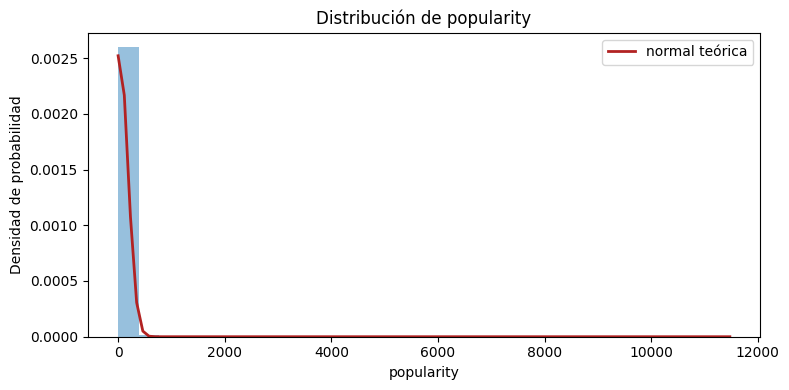

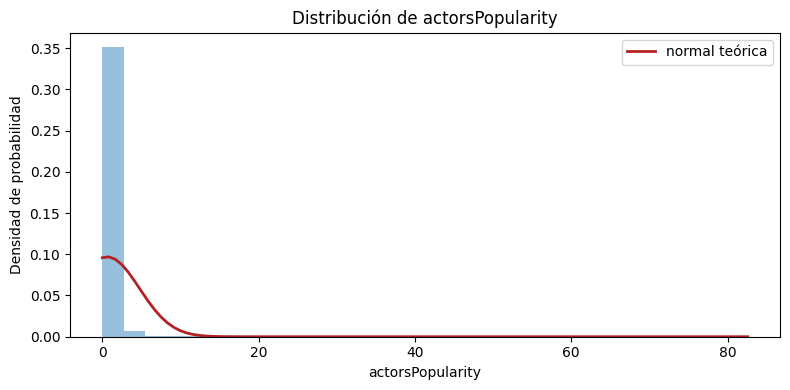

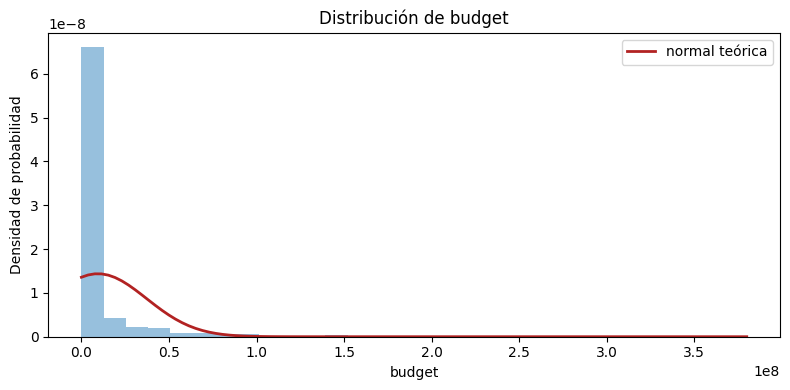

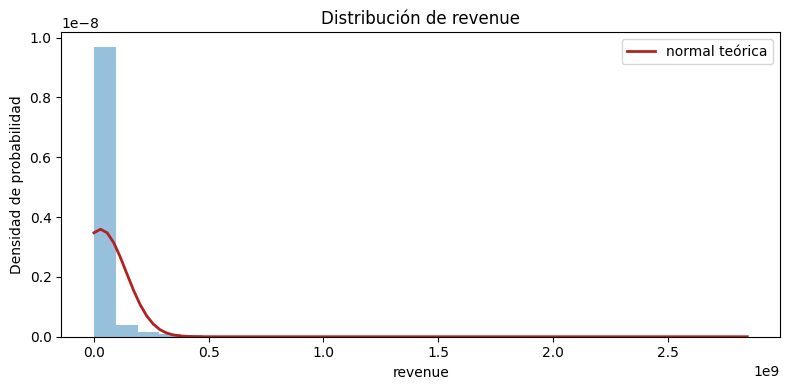

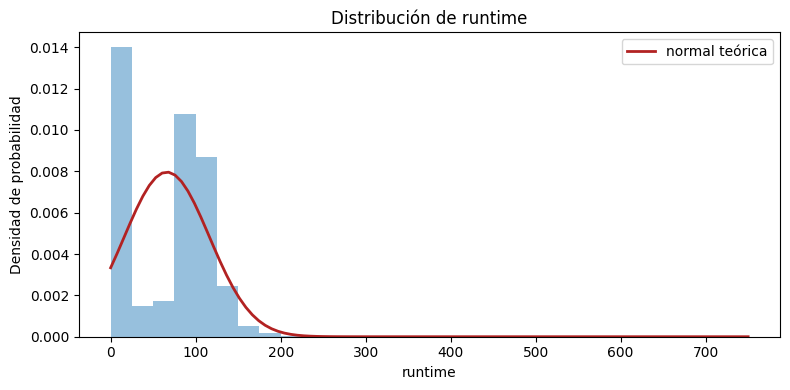

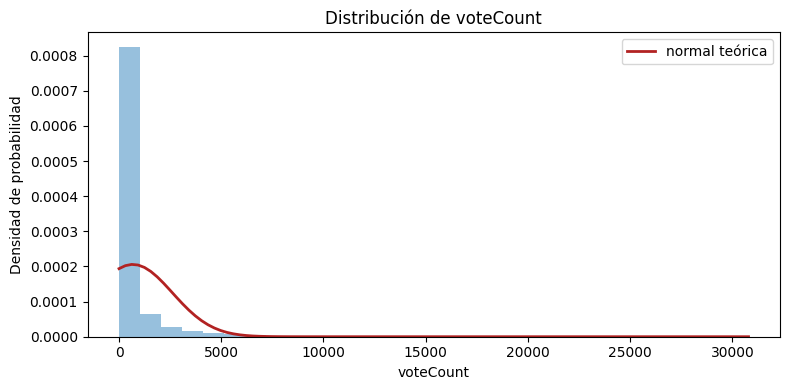

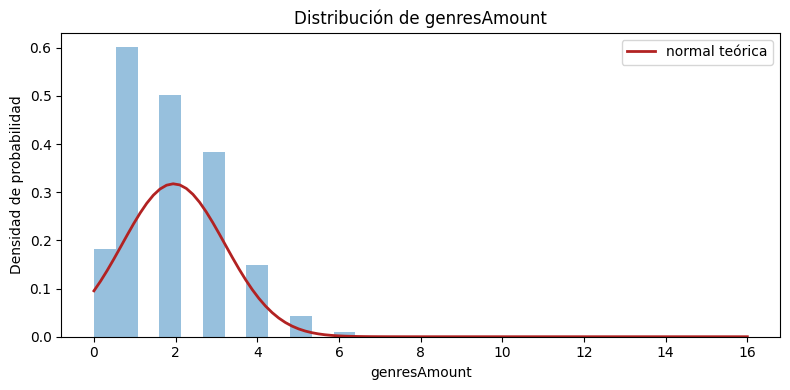

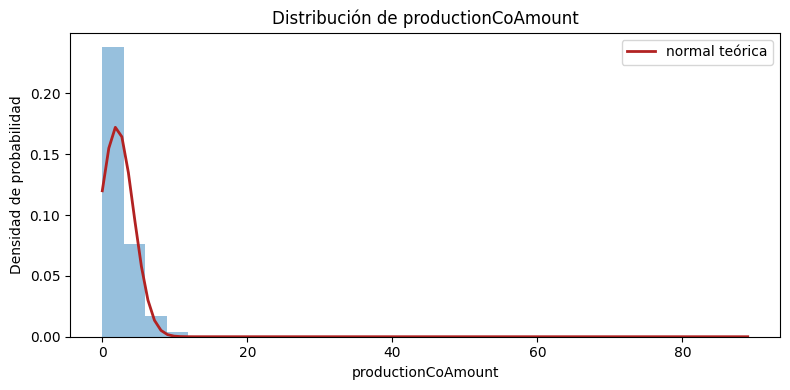

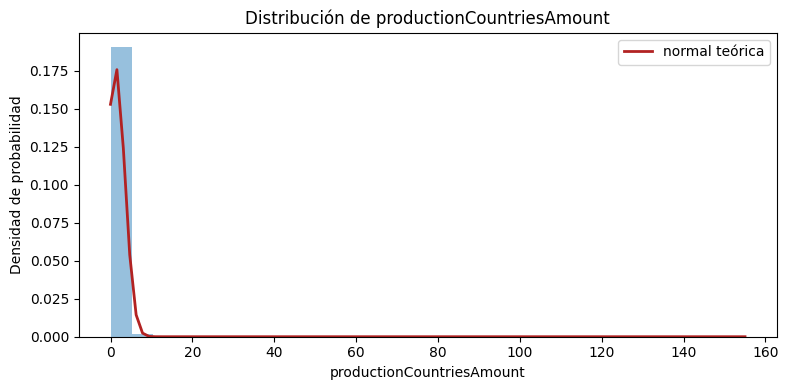

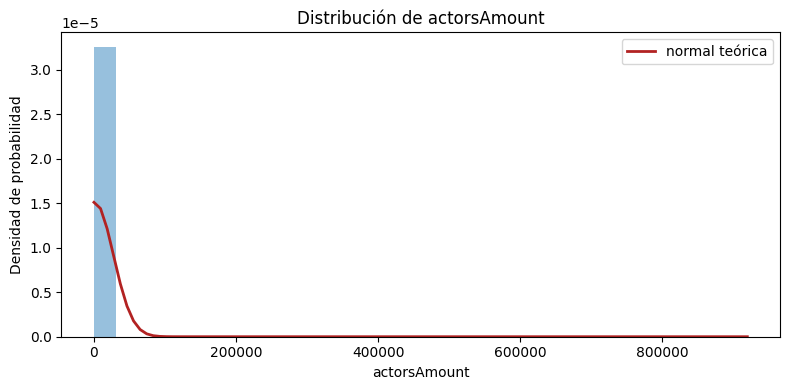

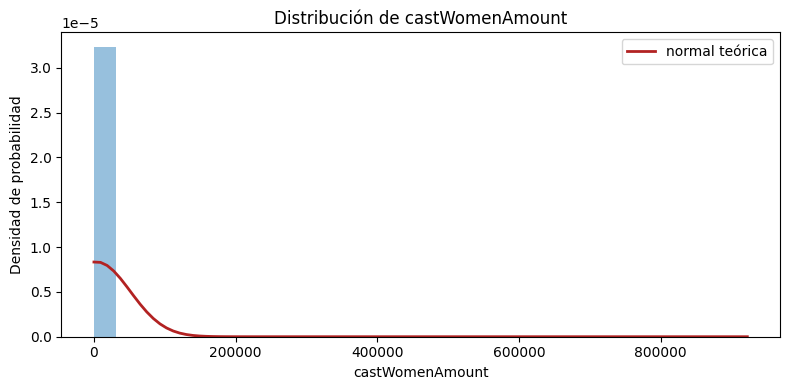

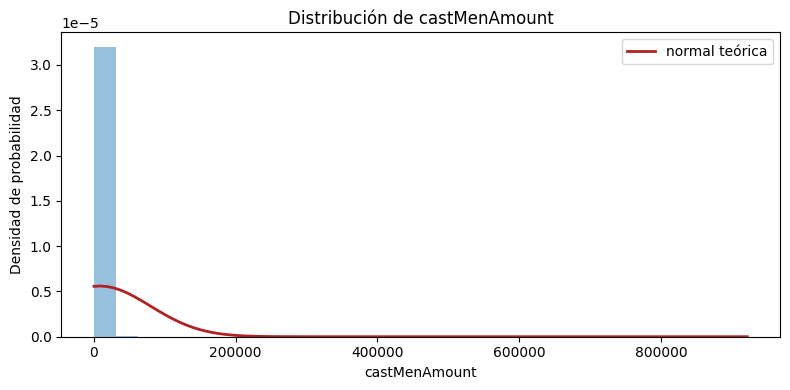

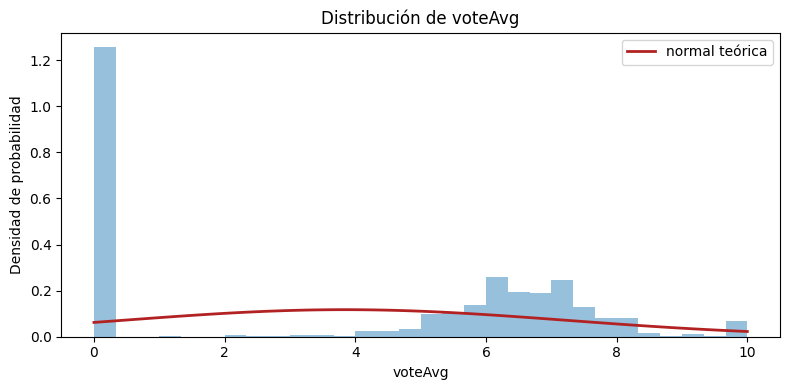

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cargar datos
df = pd.read_csv('movies_2026.csv')

# Variables cuantitativas
continuas = ['popularity', 'actorsPopularity']
discretas = ['budget', 'revenue', 'runtime', 'voteCount', 'genresAmount', 
             'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
             'castWomenAmount', 'castMenAmount', 'voteAvg']

todas_cuantitativas = continuas + discretas

# Histograma + Curva Normal Teorica

for col in todas_cuantitativas:
    if col in df.columns:
        # Eliminar valores nulos y convertir a numérico
        datos = pd.to_numeric(df[col], errors='coerce').dropna()
        
        # Verificar que hay datos válidos
        if len(datos) > 0:
            # Media y desviación estándar
            mu, sigma = stats.norm.fit(datos)
            
            # Valores teóricos de la normal
            x_hat = np.linspace(min(datos), max(datos), num=100)
            y_hat = stats.norm.pdf(x_hat, mu, sigma)
            
            # Gráfico
            fig, ax = plt.subplots(figsize=(8, 4))
            ax.plot(x_hat, y_hat, linewidth=2, color='firebrick', label='normal teórica')
            ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
            ax.set_title(f'Distribución de {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Densidad de probabilidad')
            ax.legend()
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: '{col}' no contiene datos numéricos válidos")

In [ ]:

# Análisis de Asimetria y Curtosis

print("="*80)
print("ANALISIS DE NORMALIDAD - ASIMETRIA Y CURTOSIS")
print("="*80)

resultados = []

for col in todas_cuantitativas:
    if col in df.columns:
        # Eliminar valores nulos y convertir a numérico
        datos = pd.to_numeric(df[col], errors='coerce').dropna()
        
        # Verificar que hay datos válidos
        if len(datos) > 0:
            # Calcular asimetría y curtosis
            asimetria = stats.skew(datos)
            curtosis = stats.kurtosis(datos)
            
            # Interpretación de asimetría
            if -0.5 <= asimetria <= 0.5:
                interp_asim = "Simétrica (Normal)"
            elif -1 <= asimetria < -0.5 or 0.5 < asimetria <= 1:
                interp_asim = "Moderadamente asimétrica"
            elif -2 <= asimetria < -1 or 1 < asimetria <= 2:
                interp_asim = "Altamente asimétrica"
            else:
                interp_asim = "Extremadamente asimétrica"
            
            # Interpretación de curtosis
            if -0.5 <= curtosis <= 0.5:
                interp_curt = "Normal"
            elif -1 <= curtosis < -0.5 or 0.5 < curtosis <= 1:
                interp_curt = "Moderada desviación"
            elif -2 <= curtosis < -1 or 1 < curtosis <= 2:
                interp_curt = "Alta desviación"
            else:
                interp_curt = "Desviación extrema"
            
            resultados.append({
                'Variable': col,
                'Asimetría': round(asimetria, 4),
                'Interpretación Asimetría': interp_asim,
                'Curtosis': round(curtosis, 4),
                'Interpretación Curtosis': interp_curt
            })
        else:
            print(f"Advertencia: '{col}' no contiene datos numéricos válidos")

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar resultados
print("\n")
for _, row in df_resultados.iterrows():
    print(f"Variable: {row['Variable']}")
    print(f"  Asimetría: {row['Asimetría']:>8}  -> {row['Interpretación Asimetría']}")
    print(f"  Curtosis:  {row['Curtosis']:>8}  -> {row['Interpretación Curtosis']}")
    print("-"*80)

print("\n" + "="*80)
print("GUÍA DE INTERPRETACIÓN:")
print("="*80)
print("\nASIMETRÍA (Skewness):")
print("  -0.5 a +0.5  : Simétrica (aproximadamente normal)")
print("  -1 a -0.5 ó +0.5 a +1 : Moderadamente asimétrica")
print("  -2 a -1 ó +1 a +2 : Altamente asimétrica")
print("  <-2 ó >+2    : Extremadamente asimétrica")

print("\nCURTOSIS (Excess Kurtosis):")
print("  -0.5 a +0.5  : Normal")
print("  -1 a -0.5 ó +0.5 a +1 : Moderada desviación")
print("  -2 a -1 ó +1 a +2 : Alta desviación")
print("  <-2 ó >+2    : Desviación extrema")

print("\n" + "="*80)
print("NOTA: Si ambos valores están en rango [-0.5, 0.5], la variable")
print("      sigue aproximadamente una distribución normal.")
print("="*80)

ANALISIS DE NORMALIDAD - ASIMETRIA Y CURTOSIS


Variable: popularity
  Asimetría:  41.3902  -> Extremadamente asimétrica
  Curtosis:  2321.333  -> Desviación extrema
--------------------------------------------------------------------------------
Variable: actorsPopularity
  Asimetría:   15.952  -> Extremadamente asimétrica
  Curtosis:  295.9901  -> Desviación extrema
--------------------------------------------------------------------------------
Variable: budget
  Asimetría:   4.7277  -> Extremadamente asimétrica
  Curtosis:   28.4953  -> Desviación extrema
--------------------------------------------------------------------------------
Variable: revenue
  Asimetría:   8.2605  -> Extremadamente asimétrica
  Curtosis:  106.4551  -> Desviación extrema
--------------------------------------------------------------------------------
Variable: runtime
  Asimetría:   0.2368  -> Simétrica (Normal)
  Curtosis:    2.1114  -> Desviación extrema
-------------------------------------------------

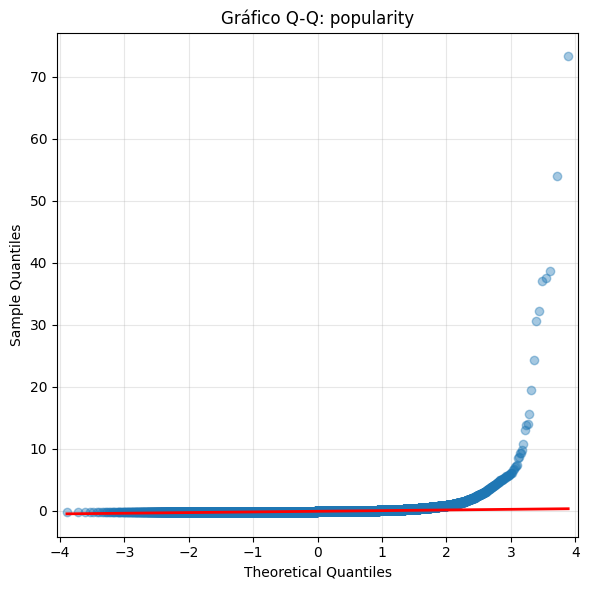

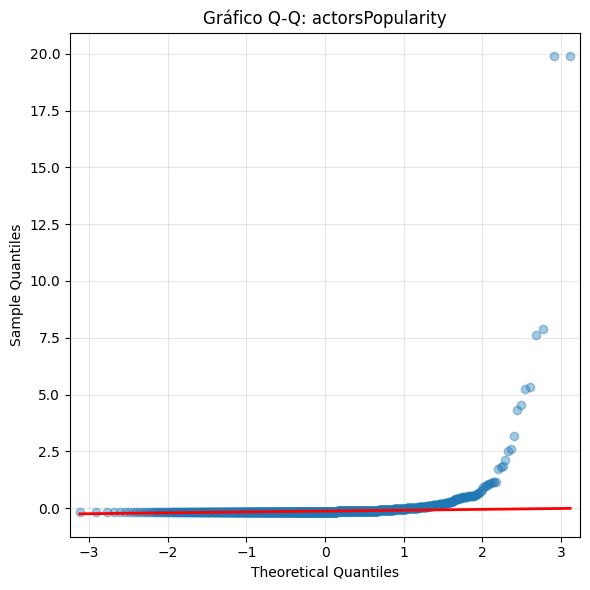

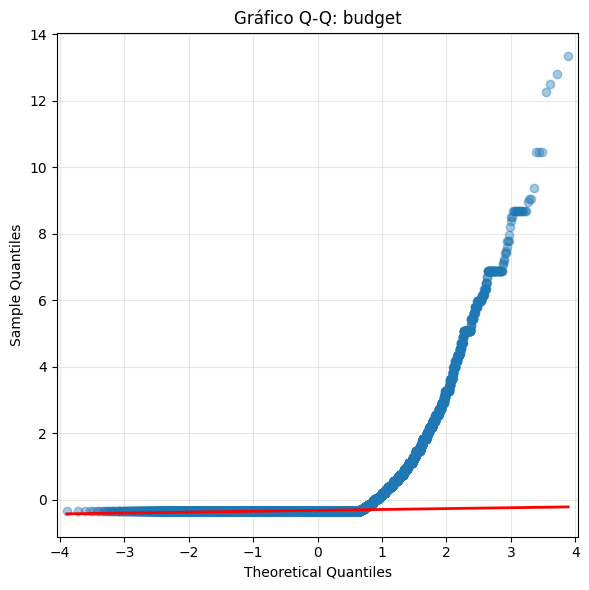

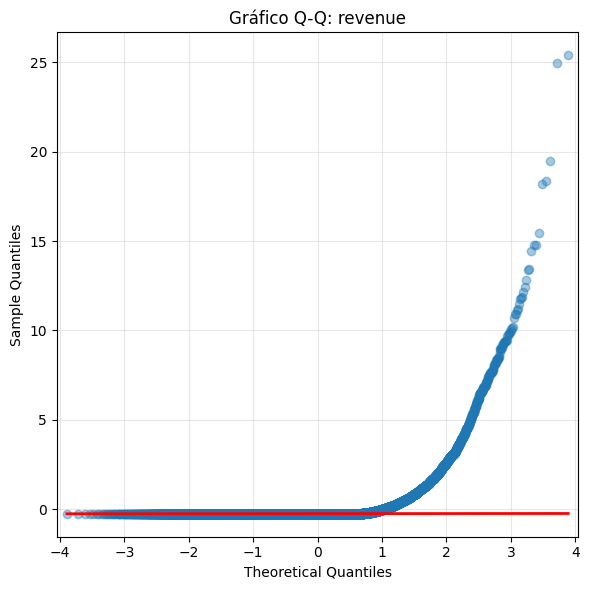

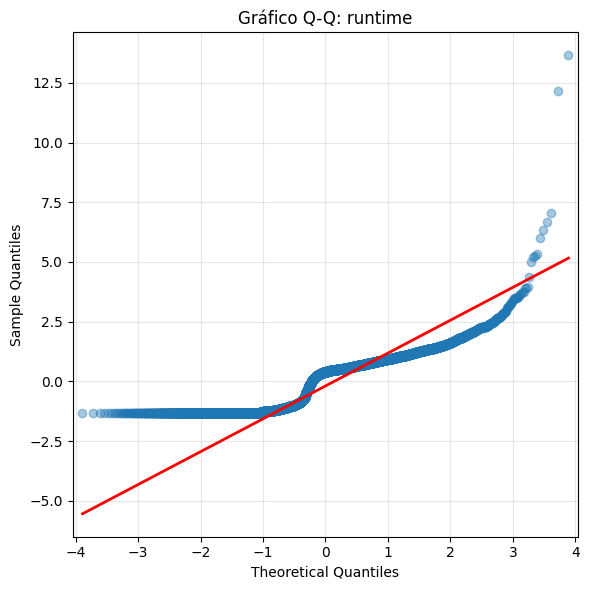

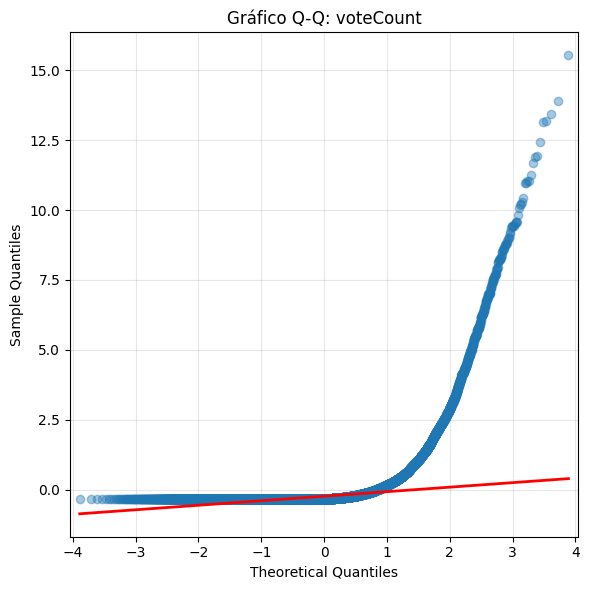

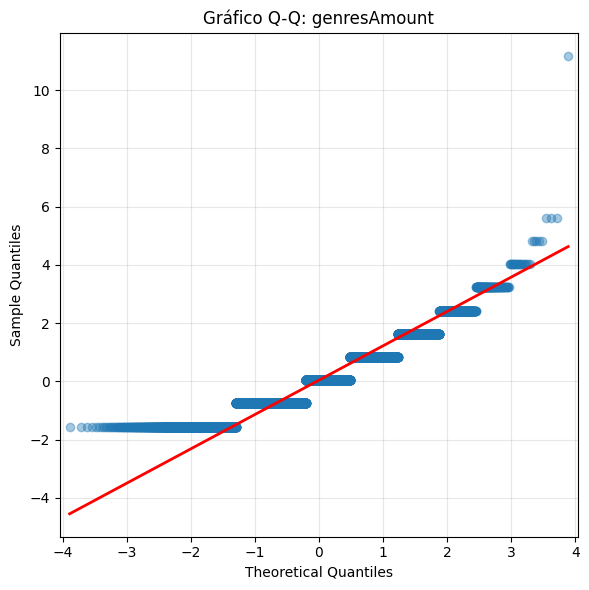

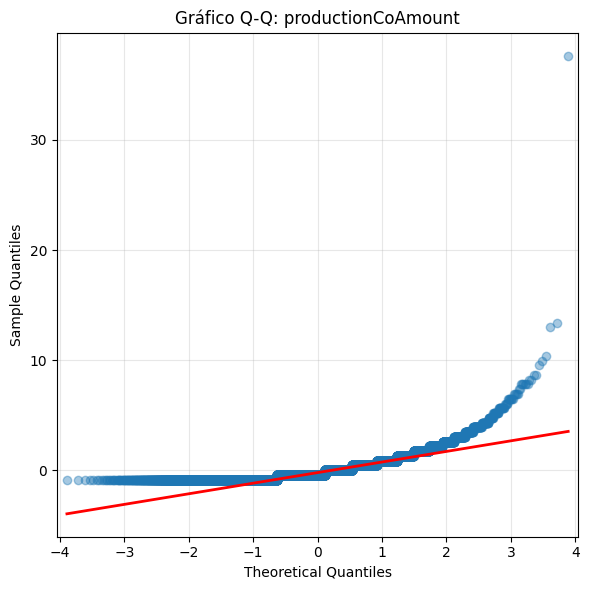

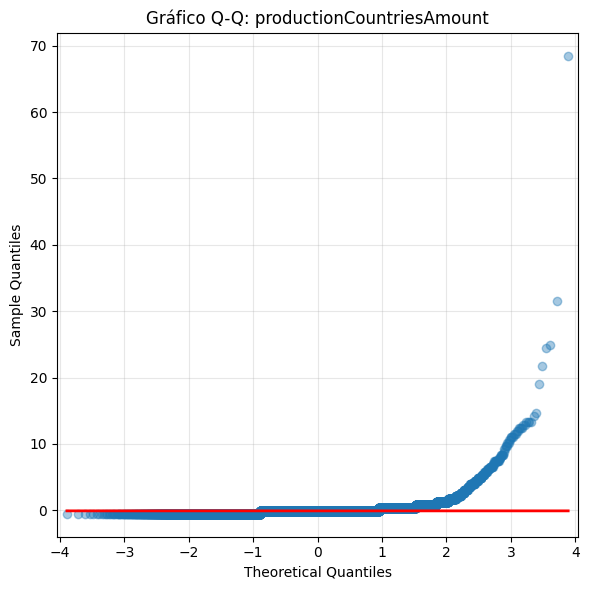

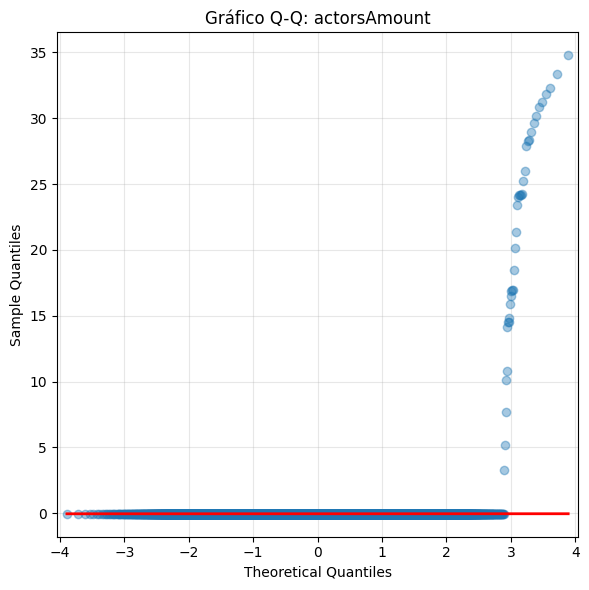

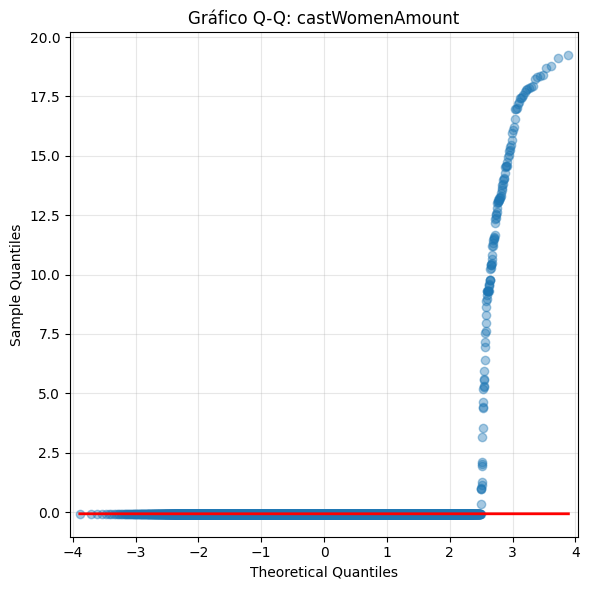

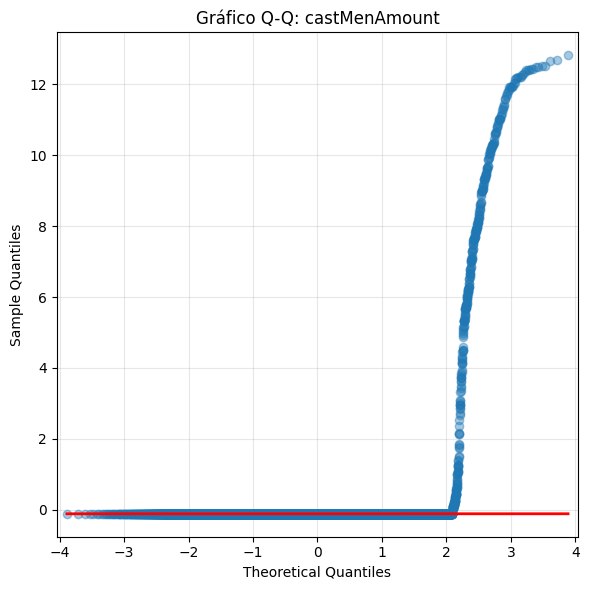

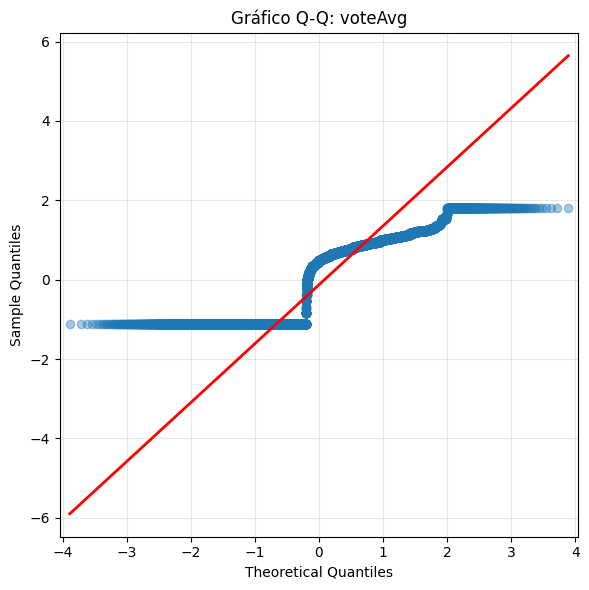

In [33]:
import statsmodels.api as sm

# ==============================================================================
# Gráficos Q-Q
# ==============================================================================

for col in todas_cuantitativas:
    if col in df.columns:
        # Eliminar valores nulos y convertir a numérico
        datos = pd.to_numeric(df[col], errors='coerce').dropna()
        
        # Verificar que hay datos válidos
        if len(datos) > 0:
            # Gráfico Q-Q
            fig, ax = plt.subplots(figsize=(6, 6))
            sm.qqplot(
                data=datos,
                fit=True,
                line='q',
                alpha=0.4,
                ax=ax
            )
            
            # Personalizar la línea de referencia
            ref_line = ax.lines[1]
            ref_line.set_color('red')
            ref_line.set_linewidth(2)
            
            ax.set_title(f'Gráfico Q-Q: {col}')
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Advertencia: '{col}' no contiene datos numéricos válidos")

TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS ORDINALES

Variable: releaseDate
Total de datos: 19881
Categorías únicas: 5663

Mostrando las 20 categorías más frecuentes:

 Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
2026-01-30         263                     1.32                 19701                    119.00
2025-11-07         258                     1.30                 10672                     73.63
2025-11-08         239                     1.20                 10911                     74.83
2025-12-05         231                     1.16                 14690                     93.80
2025-11-20         225                     1.13                 12556                     83.09
2026-01-01         212                     1.07                 17556                    108.20
2025-11-21         207                     1.04                 12763                     84.13
2025-11-14         204                     1.03             

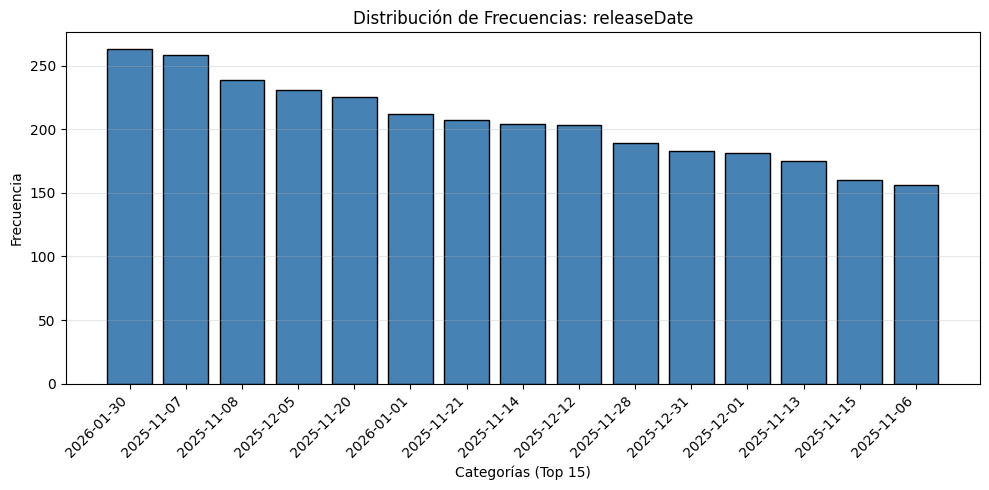


Variable: releaseYear
Total de datos: 19881
Categorías únicas: 101

Mostrando las 20 categorías más frecuentes:

 Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
    2025.0        7351                    36.98                 17344                     87.39
    2026.0        2537                    12.76                 19881                    100.15
    2021.0         814                     4.09                  9986                     50.37
    2018.0         628                     3.16                  8030                     40.54
    2017.0         617                     3.10                  7402                     37.38
    2019.0         611                     3.07                  8641                     43.61
    2016.0         557                     2.80                  6785                     34.28
    2020.0         531                     2.67                  9172                     46.28
    2015.0         450

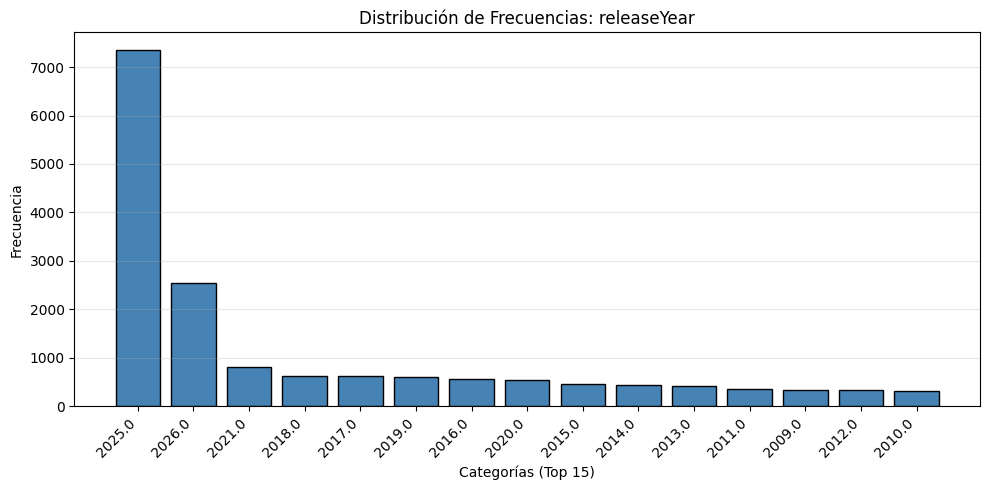


TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS NOMINALES

Variable: id
Total de datos: 19883
Categorías únicas: 19883

Mostrando las 20 categorías más frecuentes:

 Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
         5           1                     0.01                     1                      0.01
         6           1                     0.01                     2                      0.02
        11           1                     0.01                     3                      0.03
        12           1                     0.01                     4                      0.04
        13           1                     0.01                     5                      0.05
        14           1                     0.01                     6                      0.06
        15           1                     0.01                     7                      0.07
        16           1                     0.01                    

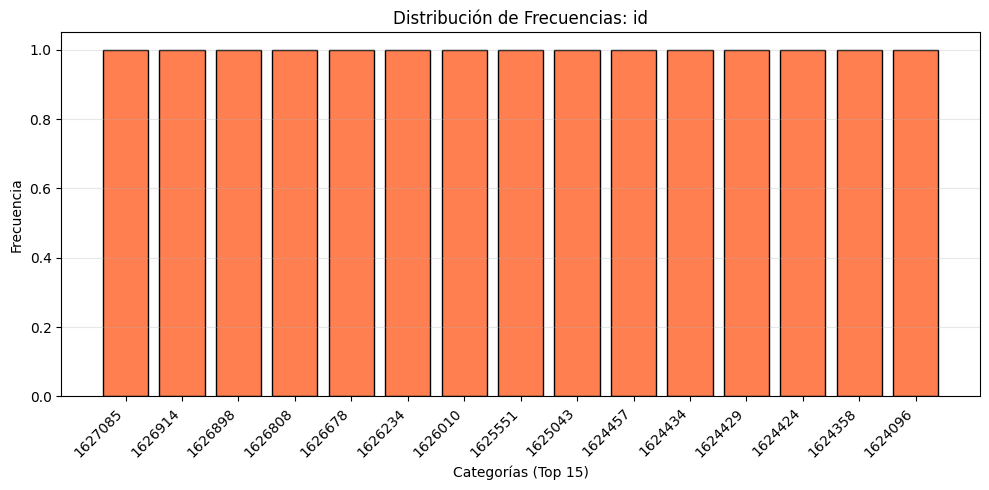


Variable: originalTitle
Total de datos: 19882
Categorías únicas: 19507

Mostrando las 20 categorías más frecuentes:

                                                                                                Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
                                                                                               Cinderella           4                     0.02                  4116                     40.60
                                                                                                Pinocchio           4                     0.02                 12014                    118.20
                                                                                                    Arena           3                     0.02                  2427                     24.01
                                                                                                Aftermath           3 

C:\Users\David\AppData\Local\Temp\ipykernel_7516\1141361779.py:129: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_7516\1141361779.py:129: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_7516\1141361779.py:129: UserWarning: Glyph 12405 (\N{HIRAGANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_7516\1141361779.py:129: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_7516\1141361779.py:129: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_7516\1141361779.py:129: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) m

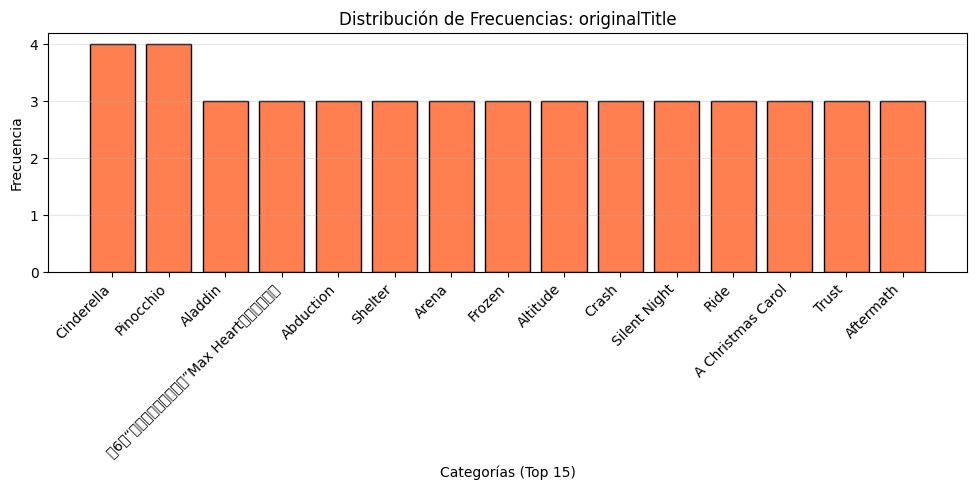


Variable: originalLanguage
Total de datos: 19883
Categorías únicas: 94

Mostrando las 20 categorías más frecuentes:

Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
       en       11961                    60.16                 12934                     65.08
       es        1238                     6.23                 14172                     71.31
       fr        1094                     5.50                 15420                     77.59
       ja         868                     4.37                 16954                     85.34
       pt         628                     3.16                 18524                     93.28
       de         461                     2.32                   931                      4.70
       zh         365                     1.84                 19882                    100.17
       ko         336                     1.69                 17362                     87.40
       it         302      

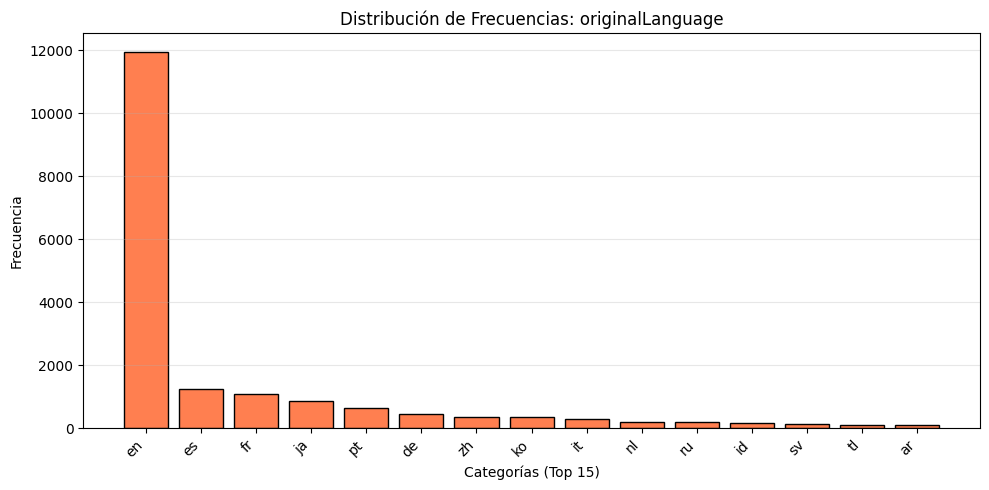


Variable: title
Total de datos: 19882
Categorías únicas: 19385

Mostrando las 20 categorías más frecuentes:

          Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
         Cinderella           5                     0.03                  3389                     33.24
          Pinocchio           4                     0.02                 11912                    116.65
              Drive           3                     0.02                  4838                     47.30
       Little Women           3                     0.02                  9232                     90.44
          Aftermath           3                     0.02                   942                      9.32
  A Christmas Carol           3                     0.02                   364                      3.61
 Great Expectations           3                     0.02                  6568                     64.26
Alice in Wonderland           3                   

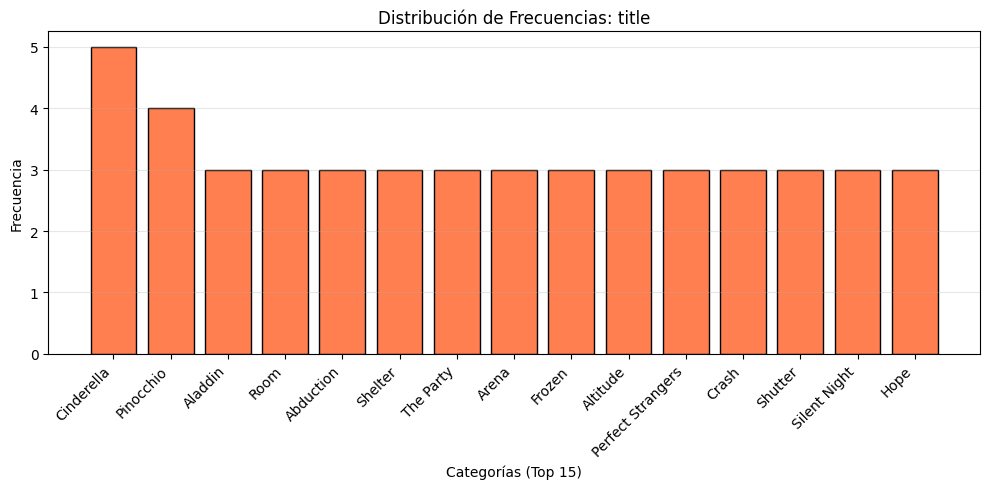


Variable: homePage
Total de datos: 5607
Categorías únicas: 5487

Mostrando las 20 categorías más frecuentes:

                                                  Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
                  https://watch.njpwworld.com/details/60769          16                     0.29                  3423                     68.25
                               http://www.naruto-movie.com/           6                     0.11                  1878                     37.46
                                    https://tractorted.com/           6                     0.11                  3330                     66.42
                           http://www.thehungergames.movie/           4                     0.07                  2429                     48.46
                                  http://www.avikomfilm.com           4                     0.07                  1026                     20.46
                   

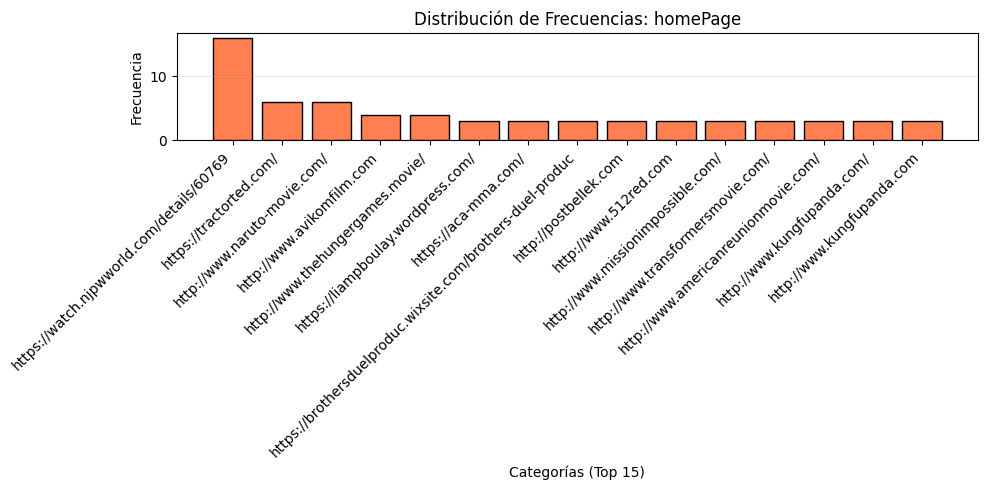


Variable: video
Total de datos: 19397
Categorías únicas: 2

Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
    False       19313                    99.57                 19313                     99.57
     True          84                     0.43                 19397                    100.00


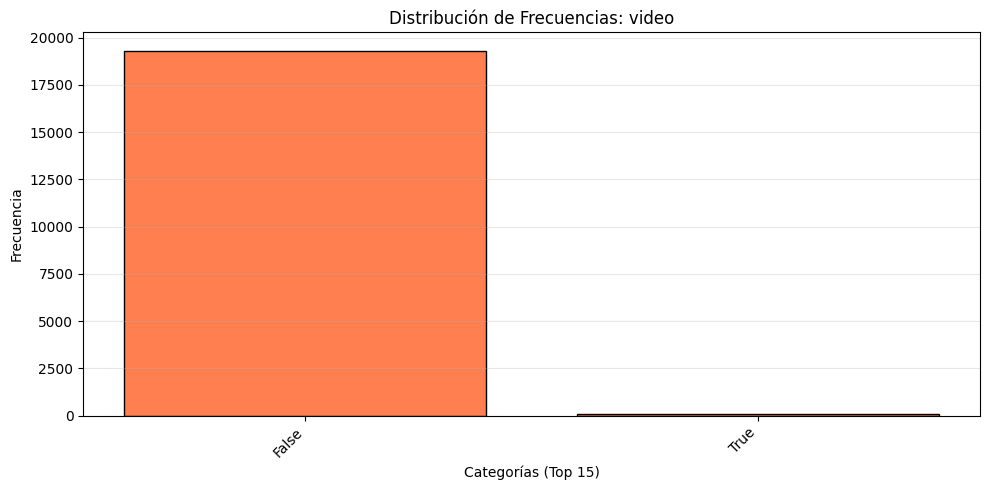


Variable: director
Total de datos: 18907
Categorías únicas: 13668

Mostrando las 20 categorías más frecuentes:

        Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
 Steven Spielberg          29                     0.15                 16621                    136.86
   Clint Eastwood          28                     0.15                  3288                     27.71
     Ridley Scott          23                     0.12                 14633                    121.20
  Martin Scorsese          19                     0.10                 11437                     94.71
  Kunihiko Yuyama          19                     0.10                  9933                     81.96
Steven Soderbergh          19                     0.10                 16592                    136.71
  Robert Zemeckis          18                     0.10                 14896                    123.12
       Ron Howard          18                     0.10         

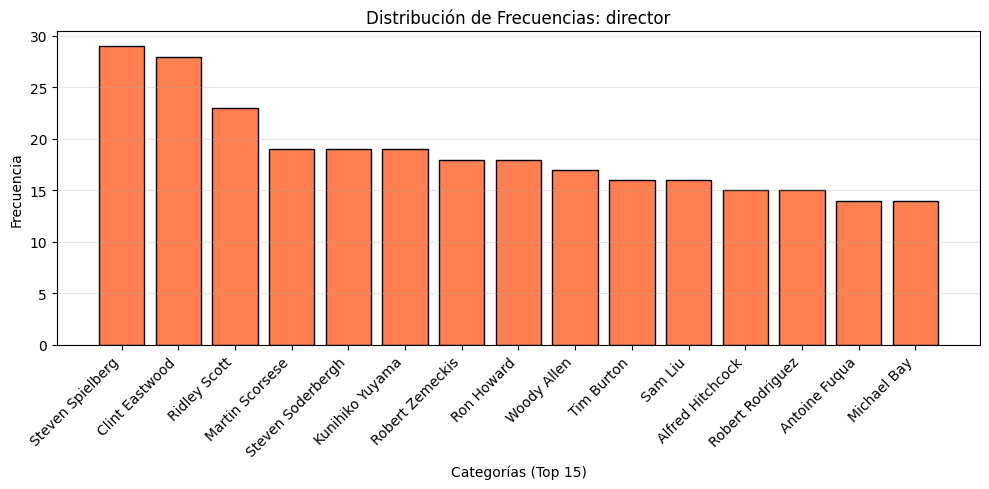


Variable: genres
Total de datos: 17918
Categorías únicas: 2827

Mostrando las 20 categorías más frecuentes:

           Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
         Documentary        1847                    10.31                  8620                     51.69
               Drama        1705                     9.52                 10723                     63.58
              Comedy        1016                     5.67                  4652                     28.69
              Horror         502                     2.80                 14153                     84.58
           Animation         318                     1.77                  2707                     16.91
       Drama|Romance         301                     1.68                 12253                     72.69
     Horror|Thriller         282                     1.57                 15032                     89.85
        Comedy|Drama         260          

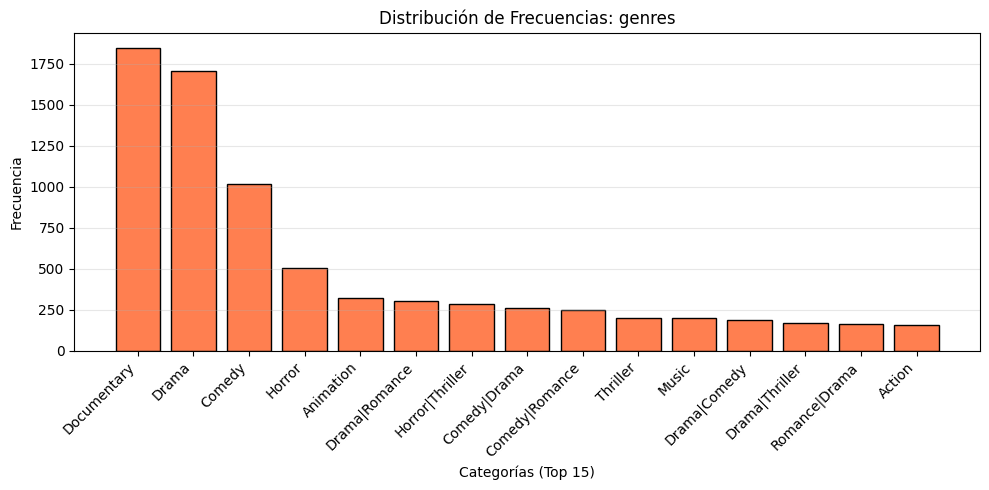


Variable: productionCompany
Total de datos: 14223
Categorías únicas: 12232

Mostrando las 20 categorías más frecuentes:

                                         Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
                                         Paramount          55                     0.39                  8868                     82.85
                                Universal Pictures          50                     0.35                 12598                    117.60
                             Warner Bros. Pictures          37                     0.26                 13528                    125.87
                                    Toei Animation          36                     0.25                 11999                    112.28
                              DreamWorks Animation          33                     0.23                  3686                     34.38
                                        The Asylum          33

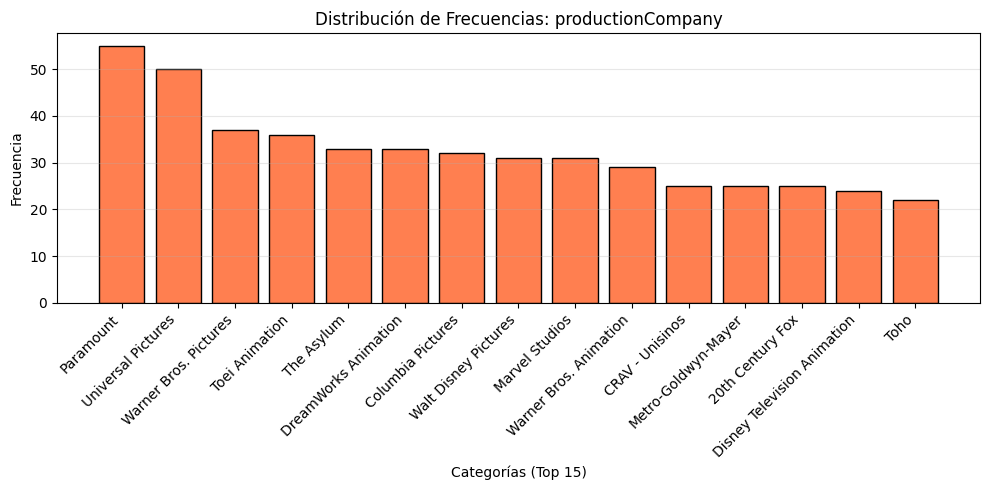


Variable: productionCountry
Total de datos: 16009
Categorías únicas: 1406

Mostrando las 20 categorías más frecuentes:

                              Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
               United States of America        4968                    31.03                 15714                    101.17
                                     US         850                     5.31                  9948                     64.89
                                  Japan         613                     3.83                  6914                     45.33
                                     FR         428                     2.67                  3808                     25.05
                                     GB         357                     2.23                  4601                     30.31
United Kingdom|United States of America         339                     2.12                 10718                     69.92
    

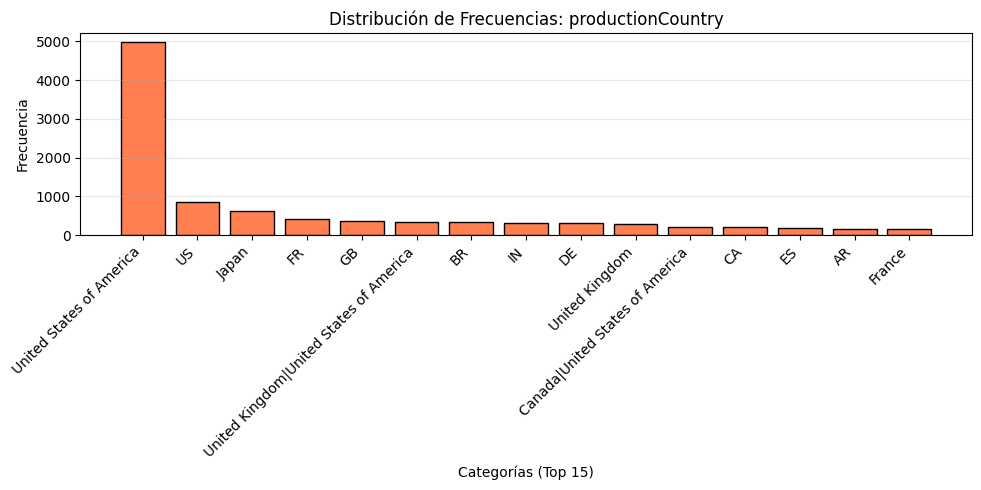


Variable: actors
Total de datos: 17282
Categorías únicas: 16733

Mostrando las 20 categorías más frecuentes:

                                                                                                                                             Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
                                                                                                                                                 FALSE         480                     2.78                  5350                     51.32
                                                                                                                                        Donovan Haessy           6                     0.03                  4097                     40.86
                                                                                                                                                  TRUE           6                   

C:\Users\David\AppData\Local\Temp\ipykernel_7516\1141361779.py:129: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


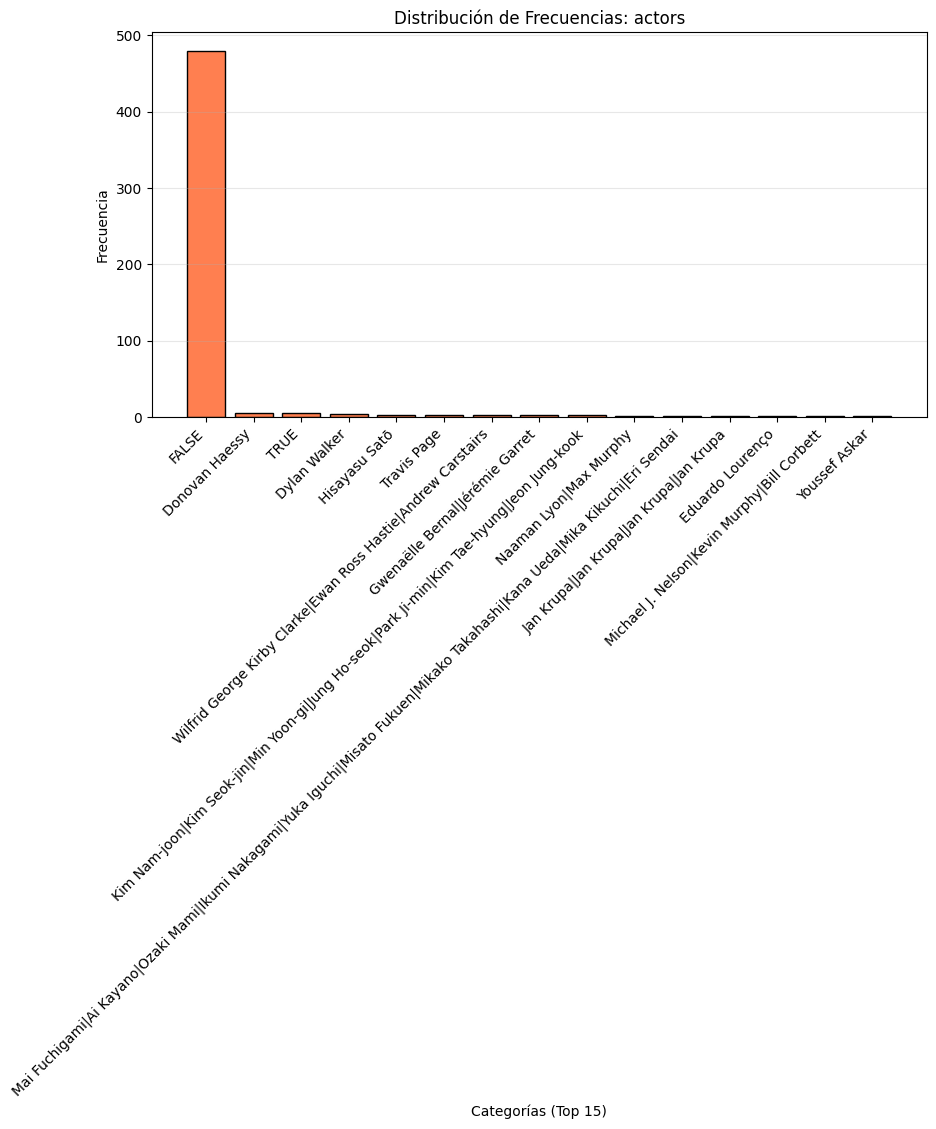


Variable: actorsCharacter
Total de datos: 17048
Categorías únicas: 14968

Mostrando las 20 categorías más frecuentes:

                                        Categoría  Frecuencia  Frecuencia Relativa (%)  Frecuencia Acumulada  Frec. Rel. Acumulada (%)
                                                |         233                     1.37                 15767                    153.06
                                             Self         197                     1.16                 12481                    122.90
                                              |||         191                     1.12                 16203                    155.85
                                        |||||||||         189                     1.11                 16935                    160.31
                                               ||         188                     1.10                 15993                    154.54
                                             ||||         165         

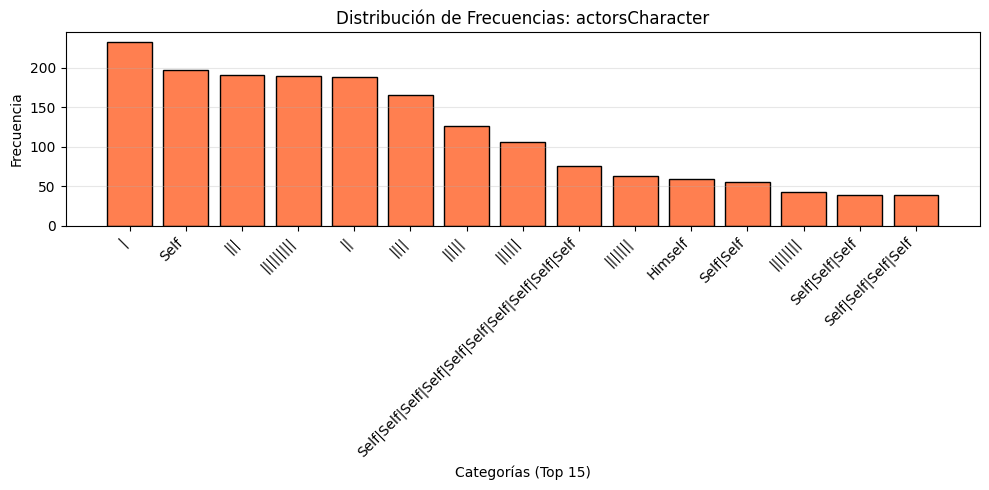


ANÁLISIS COMPLETADO


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('movies_2026.csv')    

# Variables cualitativas ordinales
ordinales = ['releaseDate', 'releaseYear']

# Variables cualitativas nominales
nominales = ['id', 'originalTitle', 'originalLanguage', 'title', 'homePage',
             'video', 'director', 'genres', 'productionCompany', 
             'productionCountry', 'actors', 'actorsCharacter']

# ==============================================================================
# Tablas de Frecuencias
# ==============================================================================

def tabla_frecuencias(datos, nombre_var):
    """Crea tabla de frecuencias completa"""
    
    # Frecuencias absolutas
    freq_abs = datos.value_counts().sort_index()
    
    # Frecuencias relativas (porcentaje)
    freq_rel = (datos.value_counts(normalize=True).sort_index() * 100).round(2)
    
    # Frecuencias acumuladas
    freq_acum = freq_abs.cumsum()
    freq_rel_acum = freq_rel.cumsum().round(2)
    
    # Crear tabla
    tabla = pd.DataFrame({
        'Categoría': freq_abs.index,
        'Frecuencia': freq_abs.values,
        'Frecuencia Relativa (%)': freq_rel.values,
        'Frecuencia Acumulada': freq_acum.values,
        'Frec. Rel. Acumulada (%)': freq_rel_acum.values
    })
    
    return tabla

# ==============================================================================
# VARIABLES ORDINALES
# ==============================================================================

print("="*80)
print("TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS ORDINALES")
print("="*80)

for col in ordinales:
    if col in df.columns:
        print(f"\n{'='*80}")
        print(f"Variable: {col}")
        print(f"{'='*80}")
        
        datos = df[col].dropna()
        n_categorias = datos.nunique()
        
        print(f"Total de datos: {len(datos)}")
        print(f"Categorías únicas: {n_categorias}\n")
        
        # Crear tabla
        tabla = tabla_frecuencias(datos, col)
        
        # Si hay muchas categorías, mostrar solo las primeras
        if n_categorias > 20:
            print("Mostrando las 20 categorías más frecuentes:\n")
            # Ordenar por frecuencia descendente y tomar las primeras 20
            tabla_ordenada = tabla.sort_values('Frecuencia', ascending=False).head(20)
            print(tabla_ordenada.to_string(index=False))
        else:
            print(tabla.to_string(index=False))
        
        # Gráfico de barras
        fig, ax = plt.subplots(figsize=(10, 5))
        top_cats = datos.value_counts().head(15)
        ax.bar(range(len(top_cats)), top_cats.values, color='steelblue', edgecolor='black')
        ax.set_xticks(range(len(top_cats)))
        ax.set_xticklabels(top_cats.index, rotation=45, ha='right')
        ax.set_xlabel('Categorías (Top 15)')
        ax.set_ylabel('Frecuencia')
        ax.set_title(f'Distribución de Frecuencias: {col}')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# ==============================================================================
# VARIABLES NOMINALES
# ==============================================================================

print("\n" + "="*80)
print("TABLAS DE FRECUENCIAS - VARIABLES CUALITATIVAS NOMINALES")
print("="*80)

for col in nominales:
    if col in df.columns:
        print(f"\n{'='*80}")
        print(f"Variable: {col}")
        print(f"{'='*80}")
        
        datos = df[col].dropna()
        n_categorias = datos.nunique()
        
        print(f"Total de datos: {len(datos)}")
        print(f"Categorías únicas: {n_categorias}\n")
        
        # Crear tabla
        tabla = tabla_frecuencias(datos, col)
        
        # Si hay muchas categorías, mostrar solo las primeras
        if n_categorias > 20:
            print("Mostrando las 20 categorías más frecuentes:\n")
            tabla_ordenada = tabla.sort_values('Frecuencia', ascending=False).head(20)
            print(tabla_ordenada.to_string(index=False))
        else:
            print(tabla.to_string(index=False))
        
        # Gráfico de barras
        fig, ax = plt.subplots(figsize=(10, 5))
        top_cats = datos.value_counts().head(15)
        ax.bar(range(len(top_cats)), top_cats.values, color='coral', edgecolor='black')
        ax.set_xticks(range(len(top_cats)))
        ax.set_xticklabels(top_cats.index, rotation=45, ha='right')
        ax.set_xlabel('Categorías (Top 15)')
        ax.set_ylabel('Frecuencia')
        ax.set_title(f'Distribución de Frecuencias: {col}')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)

## Ejercicio 4

In [8]:
#4.1
top_10_presupuesto = df.nlargest(10, 'budget') [['title', 'budget']]
print(top_10_presupuesto)

                                             title       budget
10606  Pirates of the Caribbean: On Stranger Tides  380000000.0
14600                      Avengers: Age of Ultron  365000000.0
15842                            Avengers: Endgame  356000000.0
5907                          Avatar: Fire and Ash  350000000.0
10053     Pirates of the Caribbean: At World's End  300000000.0
14843                               Justice League  300000000.0
15843                       Avengers: Infinity War  300000000.0
10497                             Superman Returns  270000000.0
13681                                      Tangled  260000000.0
17024                                The Lion King  260000000.0


In [9]:
#4.2
top_10_ingresos = df.nlargest(10, 'revenue')[['title', 'revenue']]
print(top_10_ingresos)

                              title       revenue
13100                        Avatar  2.847246e+09
15842             Avengers: Endgame  2.797801e+09
10197                       Titanic  2.187464e+09
14837  Star Wars: The Force Awakens  2.068224e+09
15843        Avengers: Infinity War  2.046240e+09
8481                     Zootopia 2  1.744338e+09
14804                Jurassic World  1.671713e+09
17024                 The Lion King  1.667635e+09
18937       Spider-Man: No Way Home  1.631853e+09
13287                  The Avengers  1.518816e+09


In [10]:
#4.3
pelicula_mas_votos = df.loc[df['voteCount'].idxmax()]
print(f"Título: {pelicula_mas_votos['title']}")
print(f"Cantidad de votos: {pelicula_mas_votos['voteCount']}")

Título: Inception
Cantidad de votos: 30788


In [11]:
#4.4
peor_pelicula = df.nsmallest(1, 'voteAvg')[['title', 'voteAvg', 'voteCount']]
print(peor_pelicula)

      title  voteAvg  voteCount
0  Immersed      0.0          0


--- Cantidad de películas producidas por año ---
releaseYear
1902.0       1
1920.0       1
1921.0       1
1922.0       1
1925.0       2
1926.0       1
1927.0       2
1929.0       1
1930.0       1
1931.0       4
1932.0       1
1933.0       1
1935.0       1
1936.0       1
1937.0       1
1938.0       1
1939.0       4
1940.0       7
1941.0       4
1942.0       4
1943.0       2
1944.0       4
1946.0       4
1947.0       4
1948.0       7
1949.0       3
1950.0       4
1951.0       6
1952.0       8
1953.0      13
1954.0      11
1955.0       7
1956.0      11
1957.0      15
1958.0       9
1959.0      12
1960.0       9
1961.0      10
1962.0      13
1963.0      16
1964.0      10
1965.0       8
1966.0      13
1967.0      16
1968.0      15
1969.0      11
1970.0      12
1971.0      16
1972.0      13
1973.0      19
1974.0      16
1975.0      16
1976.0      18
1977.0      21
1978.0      22
1979.0      20
1980.0      20
1981.0      30
1982.0      35
1983.0      28
1984.0      41
1985.0      47
1986.0   

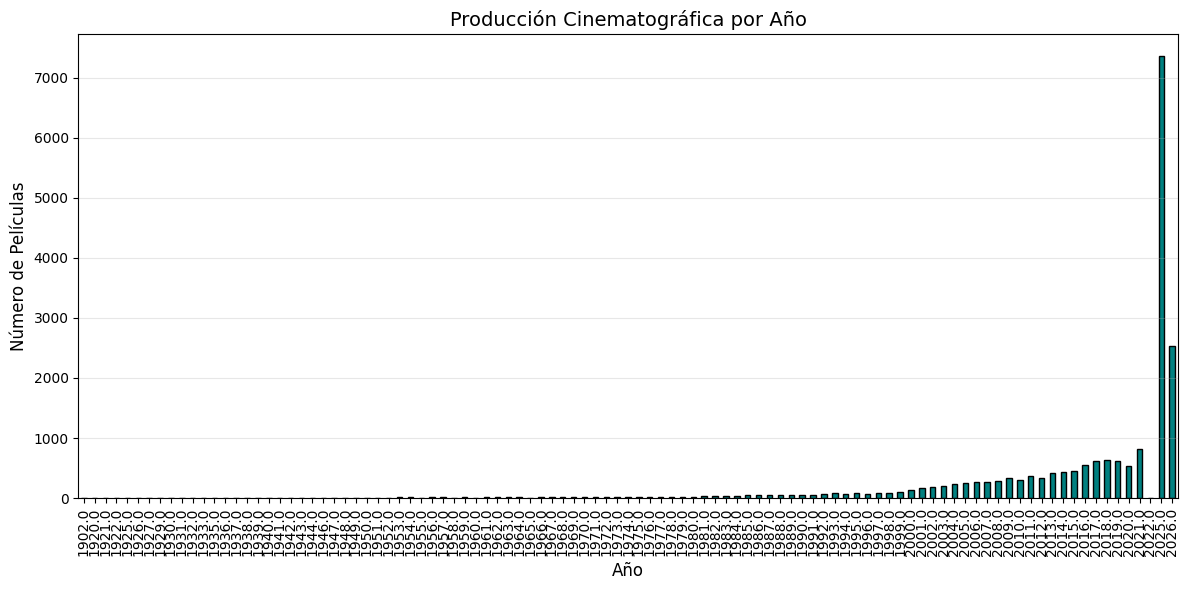

In [12]:
#4.5
# Calculamos la frecuencia de cada año
# sort_index() sirve para que la lista aparezca en orden cronológico
conteo_anios = df['releaseYear'].value_counts().sort_index()

print("--- Cantidad de películas producidas por año ---")
print(conteo_anios.to_string()) # to_string() evita que se acorte la lista si es muy larga

# Identificar el año con el máximo
anio_top = conteo_anios.idxmax()
print(f"\nEl año con mayor producción fue: {anio_top} ({conteo_anios.max()} películas)")

# --- Visualización ---
plt.figure(figsize=(12, 6))
conteo_anios.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Producción Cinematográfica por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

El género que más predomina en las 20 películas más recientes es: Drama
El género principal que predomina en todo el dataset es: Drama

La película más larga es 'How Ponyo was Born ~Hayao Miyazaki's Thought Process~'
Pertenece al género principal: Documentary (Duración: 750 min)


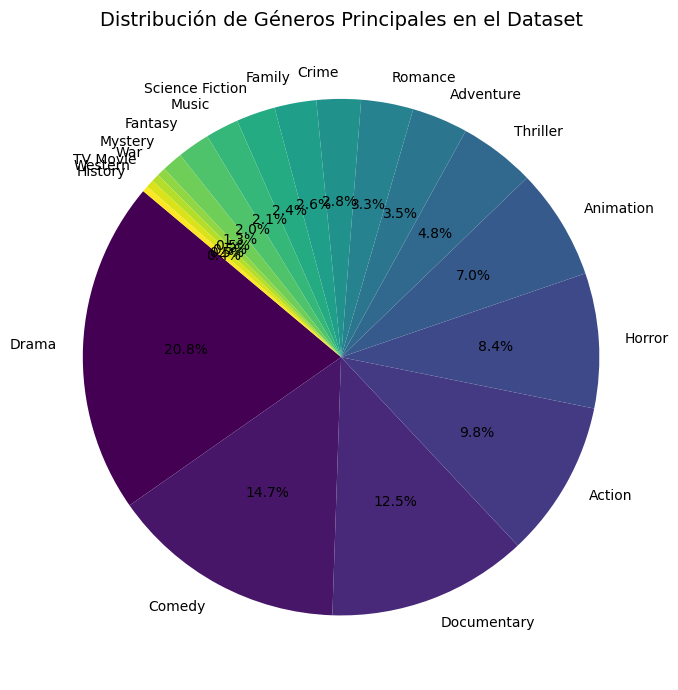

In [13]:
#4.6
df['main_genre'] = df['genres'].str.split('|').str[0].str.split(',').str[0]

# 1. Género principal de las 20 películas más recientes
# Ordenamos por fecha de lanzamiento de forma descendente
recientes_20 = df.sort_values(by='releaseDate', ascending=False).head(20)
genero_recientes = recientes_20['main_genre'].value_counts().idxmax()
print(f"El género que más predomina en las 20 películas más recientes es: {genero_recientes}")

# 2. Género principal que predomina en TODO el conjunto de datos
genero_predominante = df['main_genre'].value_counts().idxmax()
print(f"El género principal que predomina en todo el dataset es: {genero_predominante}")

# 3. ¿A qué género principal pertenecen las películas más largas?
# Tomamos las 10 más largas para ver la tendencia o la más larga absoluta
pelicula_mas_larga = df.loc[df['runtime'].idxmax()]
print(f"\nLa película más larga es '{pelicula_mas_larga['title']}'")
print(f"Pertenece al género principal: {pelicula_mas_larga['main_genre']} (Duración: {pelicula_mas_larga['runtime']} min)")

# --- Gráfico del predominio de géneros ---
plt.figure(figsize=(12, 7))
df['main_genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Distribución de Géneros Principales en el Dataset', fontsize=14)
plt.ylabel('') # Quitar etiqueta del eje Y para estética del pie chart
plt.tight_layout()
plt.show()

In [14]:
#4.7
# Preprocesamiento: Extraer género principal y calcular ganancias
df['main_genre'] = df['genres'].str.split('|').str[0].str.split(',').str[0]
df['profit'] = df['revenue'] - df['budget']

# --- 7. ¿Qué género principal obtuvo mayores ganancias? ---
# Agrupamos por género y sumamos las ganancias
ganancias_por_genero = df.groupby('main_genre')['profit'].sum().sort_values(ascending=False)

print("--- Géneros con mayores ganancias (Revenue - Budget) ---")
print(ganancias_por_genero.head(5))
print(f"\nEl género más rentable es: {ganancias_por_genero.idxmax()}")

--- Géneros con mayores ganancias (Revenue - Budget) ---
main_genre
Action       9.226311e+10
Adventure    5.984662e+10
Comedy       4.974146e+10
Drama        4.437839e+10
Animation    3.391756e+10
Name: profit, dtype: float64

El género más rentable es: Action



Correlación entre cantidad de actores e ingresos: -0.01


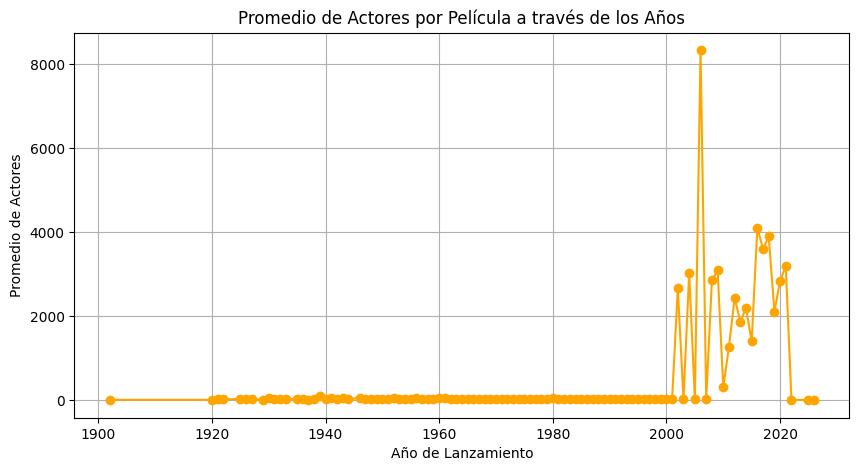

In [15]:
#  4.8

# A. ¿Influye en los ingresos? Calculamos la correlación
# La correlación va de -1 a 1. Cerca de 1 significa influencia fuerte.
corr_actores_ingresos = df['actorsAmount'].corr(df['revenue'])
print(f"\nCorrelación entre cantidad de actores e ingresos: {corr_actores_ingresos:.2f}")

# B. ¿Se han hecho películas con más actores en los últimos años?
# Agrupamos por año y vemos el promedio de actores
actores_por_anio = df.groupby('releaseYear')['actorsAmount'].mean()

# Visualización de la tendencia de actores
plt.figure(figsize=(10, 5))
actores_por_anio.plot(kind='line', marker='o', color='orange')
plt.title('Promedio de Actores por Película a través de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Promedio de Actores')
plt.grid(True)
plt.show()


--- Matriz de Correlación (Género del reparto vs Éxito) ---
                 castWomenAmount  castMenAmount  popularity   revenue
castWomenAmount         1.000000      -0.003337    0.010144 -0.017025
castMenAmount          -0.003337       1.000000    0.021513 -0.027276
popularity              0.010144       0.021513    1.000000  0.197659
revenue                -0.017025      -0.027276    0.197659  1.000000


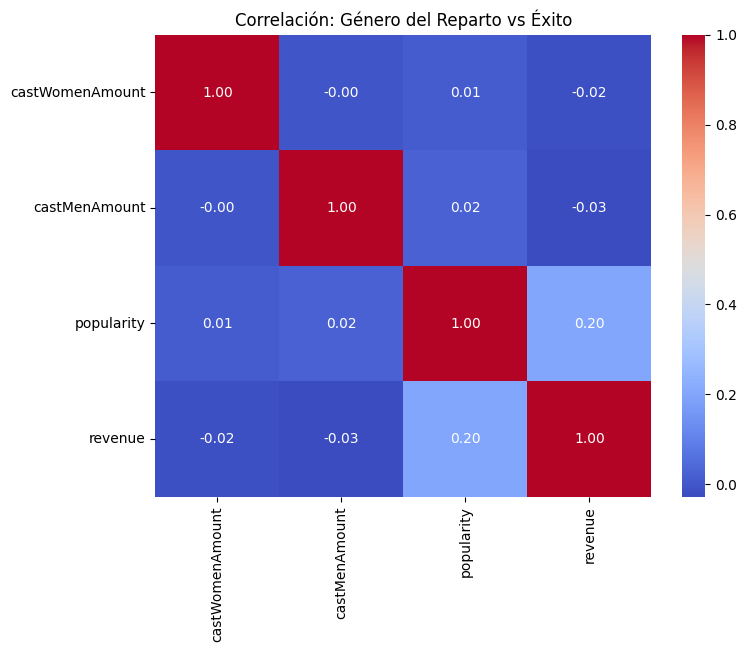

In [16]:
#4.9
# Creamos una matriz de correlación para estas variables específicas
columnas_interes = ['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']
matriz_corr = df[columnas_interes].corr()

print("\n--- Matriz de Correlación (Género del reparto vs Éxito) ---")
print(matriz_corr)

# Visualización con un mapa de calor (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación: Género del Reparto vs Éxito')
plt.show()

In [17]:
#4.10

# --- 10. Directores de las 20 películas mejor calificadas ---
# Filtramos por las 20 con mayor 'voteAvg'
# Nota: Es recomendable que tengan un mínimo de votos (ej. > 100) para evitar sesgos
top_20_calificadas = df.nlargest(20, 'voteAvg')[['title', 'director', 'voteAvg']]
print("--- Directores de las 20 películas mejor calificadas ---")
print(top_20_calificadas)

--- Directores de las 20 películas mejor calificadas ---
                                     title  \
16                          Crocodile Dose   
66                            The Exchange   
67                          What is This ?   
68                        Silver Gold Wood   
79                       AdiÃ³s Para Nunca   
97                             GO TO SLEEP   
235                  Le Moment sera le Bon   
247                                Satiata   
248                                 Orphen   
266                            Regarde toi   
418               The End of The Punchline   
434                              Play Date   
442                      Mise en FutilitÃ©   
450        Fefe - Uma aventura fantÃ¡stica   
511                            No Love 1/2   
568                               How Come   
571                             CaldeirÃ£o   
578          The Memory Beneath the Waters   
582  Hemmeligheden om de danske SS-kvinder   
585                    


La correlación entre presupuesto e ingresos es: 0.78


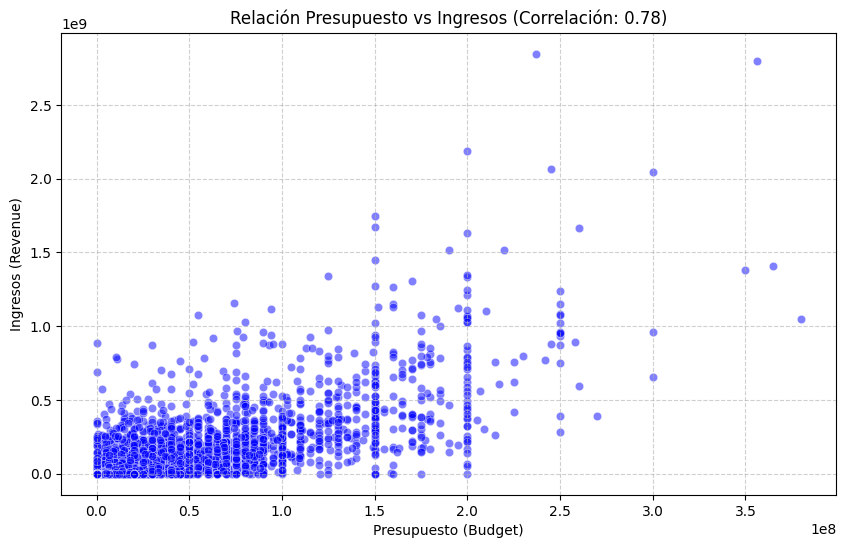

In [18]:
#4.11
# --- 11. Correlación Presupuesto vs Ingresos ---
correlacion = df['budget'].corr(df['revenue'])
print(f"\nLa correlación entre presupuesto e ingresos es: {correlacion:.2f}")

# Gráfico de Dispersión (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5, color='blue')
plt.title(f'Relación Presupuesto vs Ingresos (Correlación: {correlacion:.2f})')
plt.xlabel('Presupuesto (Budget)')
plt.ylabel('Ingresos (Revenue)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- Ingresos promedio por mes de lanzamiento ---
month
1.0     7.127284e+06
2.0     3.913863e+07
3.0     5.105330e+07
4.0     5.267127e+07
5.0     8.771977e+07
6.0     9.474711e+07
7.0     7.602870e+07
8.0     3.593072e+07
9.0     3.195854e+07
10.0    3.913316e+07
11.0    1.270010e+07
12.0    1.651783e+07
Name: revenue, dtype: float64


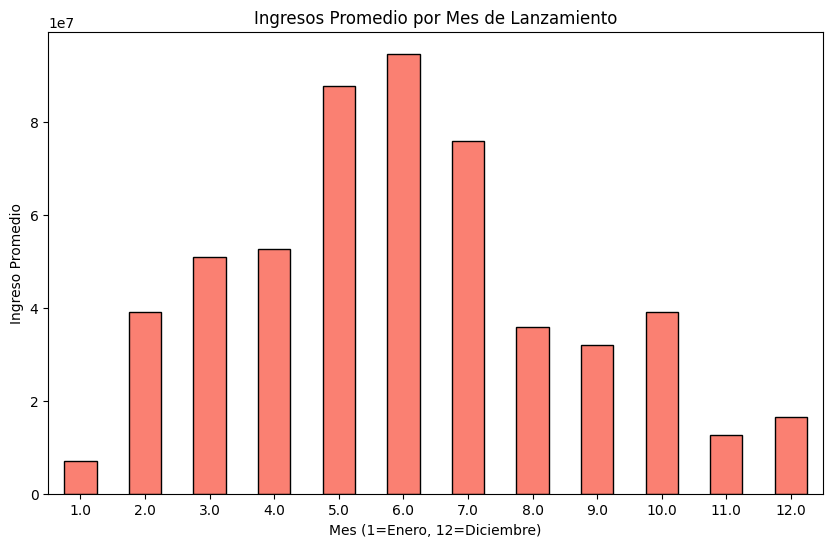

In [19]:
#4.12
# --- 12. Meses de lanzamiento e ingresos ---
# Convertimos releaseDate a formato fecha y extraemos el mes
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['month'] = df['releaseDate'].dt.month

# Agrupamos por mes y calculamos el ingreso promedio
ingresos_mes = df.groupby('month')['revenue'].mean()

print("\n--- Ingresos promedio por mes de lanzamiento ---")
print(ingresos_mes)

# Gráfico de barras por mes
plt.figure(figsize=(10, 6))
ingresos_mes.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Ingresos Promedio por Mes de Lanzamiento')
plt.xlabel('Mes (1=Enero, 12=Diciembre)')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=0)
plt.show()

In [20]:
#4.13
# --- 13. Meses con mejores ingresos y promedio de lanzamientos ---

# Ingresos totales por mes para ver cuáles son los más lucrativos
ingresos_totales_mes = df.groupby('month')['revenue'].sum().sort_values(ascending=False)
print("--- Meses con mayores ingresos totales ---")
print(ingresos_totales_mes)

# Promedio de películas lanzadas por mes
# Primero contamos cuántas películas hay por cada combinación de Año-Mes, luego promediamos los meses
conteo_por_mes_anio = df.groupby(['releaseYear', 'month']).size().reset_index(name='counts')
promedio_lanzamientos_mes = conteo_por_mes_anio.groupby('month')['counts'].mean()

print("\n--- Promedio de películas lanzadas por mes ---")
print(promedio_lanzamientos_mes)

--- Meses con mayores ingresos totales ---
month
6.0     7.759788e+10
12.0    7.203424e+10
7.0     6.173530e+10
5.0     6.131612e+10
11.0    6.007147e+10
3.0     4.165949e+10
10.0    4.163768e+10
4.0     3.660653e+10
9.0     3.445130e+10
8.0     3.284068e+10
2.0     3.029330e+10
1.0     2.223000e+10
Name: revenue, dtype: float64

--- Promedio de películas lanzadas por mes ---
month
1.0     54.719298
2.0     11.907692
3.0     13.830508
4.0     10.530303
5.0     11.459016
6.0     11.219178
7.0     12.492308
8.0     14.061538
9.0     18.271186
10.0    15.200000
11.0    73.906250
12.0    55.202532
Name: counts, dtype: float64


In [21]:
#4.14
# --- 14. Correlación Calificaciones (voteAvg) vs Éxito Comercial (revenue) ---
corr_calif_ingresos = df['voteAvg'].corr(df['revenue'])
print(f"\nCorrelación entre Calificación y Ingresos: {corr_calif_ingresos:.2f}")


Correlación entre Calificación y Ingresos: 0.23



--- Impacto de Estrategias de Marketing (Ingreso Promedio) ---
Con Video: 506,309.37 vs Sin Video: 24,845,170.24
Con Homepage: 68,249,235.83 vs Sin Homepage: 13,295,077.66


C:\Users\David\AppData\Local\Temp\ipykernel_7516\3456172709.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mkt_video.index, y=mkt_video.values, palette='viridis')
C:\Users\David\AppData\Local\Temp\ipykernel_7516\3456172709.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mkt_homepage.index, y=mkt_homepage.values, palette='magma')


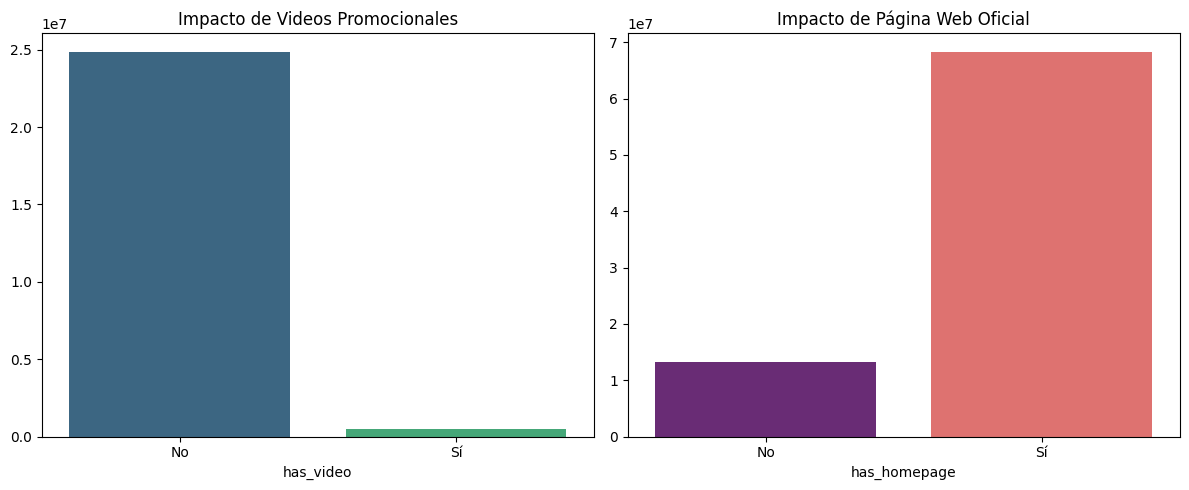

In [22]:
#4.15
# ---  Estrategias de Marketing ---
# Aseguramos que 'video' sea booleano o interpretable
df['has_video'] = df['video'].map({'TRUE': True, 'FALSE': False, True: True, False: False})
mkt_video = df.groupby('has_video')['revenue'].mean()

df['has_homepage'] = df['homePage'].notna() & (df['homePage'] != "")
mkt_homepage = df.groupby('has_homepage')['revenue'].mean()

print("\n--- Impacto de Estrategias de Marketing (Ingreso Promedio) ---")
if not mkt_video.empty:
    print(f"Con Video: {mkt_video.get(True, 0):,.2f} vs Sin Video: {mkt_video.get(False, 0):,.2f}")
if not mkt_homepage.empty:
    print(f"Con Homepage: {mkt_homepage.get(True, 0):,.2f} vs Sin Homepage: {mkt_homepage.get(False, 0):,.2f}")

# Visualización
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=mkt_video.index, y=mkt_video.values, palette='viridis')
plt.title('Impacto de Videos Promocionales')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
sns.barplot(x=mkt_homepage.index, y=mkt_homepage.values, palette='magma')
plt.title('Impacto de Página Web Oficial')
plt.xticks([0, 1], ['No', 'Sí'])
plt.tight_layout()
plt.show()


Transformando datos de popularidad del elenco...

El coeficiente de correlación de Pearson es: 0.2268


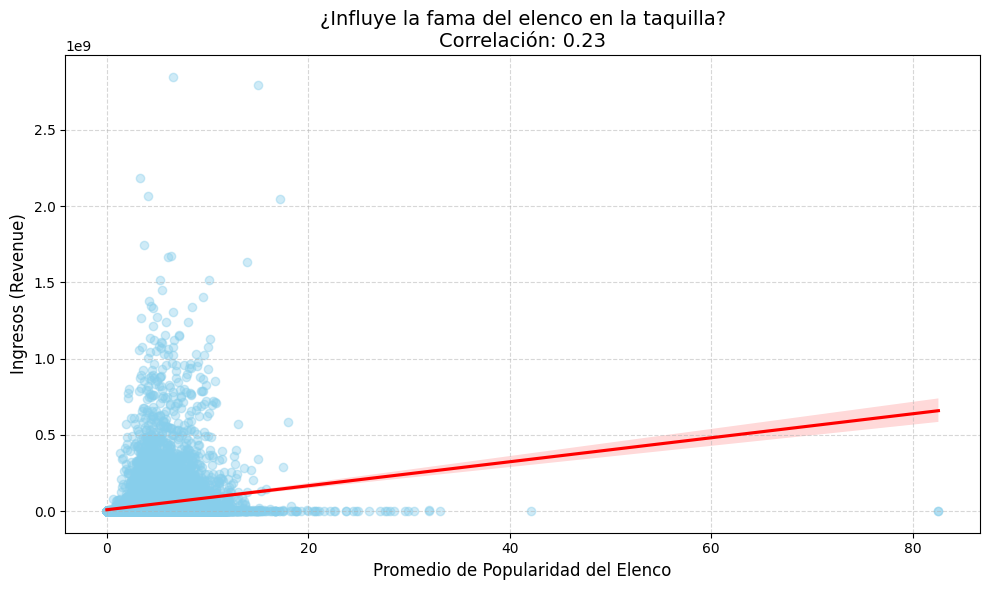

In [23]:
# 2. FUNCIÓN PARA LIMPIAR ACTORS POPULARITY
def calcular_promedio_popularidad(valor):
    try:
        if pd.isna(valor) or valor == "":
            return np.nan
        # Separamos la cadena por '|', convertimos cada parte a float y sacamos el promedio
        numeros = [float(x) for x in str(valor).split('|') if x.strip()]
        return sum(numeros) / len(numeros) if numeros else np.nan
    except:
        return np.nan

# Aplicamos la función a la columna
print("Transformando datos de popularidad del elenco...")
df['actorsPopularity_num'] = df['actorsPopularity'].apply(calcular_promedio_popularidad)

# 3. Asegurar que revenue sea numérico
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# 4. Limpiar filas sin datos para el análisis
df_clean = df.dropna(subset=['actorsPopularity_num', 'revenue'])

# 5. Calcular la correlación
correlacion = df_clean['actorsPopularity_num'].corr(df_clean['revenue'])
print(f"\nEl coeficiente de correlación de Pearson es: {correlacion:.4f}")

# 6. Visualización
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='actorsPopularity_num', y='revenue', 
            scatter_kws={'alpha':0.4, 'color': 'skyblue'}, 
            line_kws={'color':'red'})

plt.title(f'¿Influye la fama del elenco en la taquilla?\nCorrelación: {correlacion:.2f}', fontsize=14)
plt.xlabel('Promedio de Popularidad del Elenco', fontsize=12)
plt.ylabel('Ingresos (Revenue)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()